Assumptions:
* Each branch contains decisions in all periods
* For hypervolume calculation: normalise with maxmin normalisation
* For hypervolume calculation: using HyperVolume Walking Fish Group Algorithm http://www.wfg.csse.uwa.edu.au/hypervolume/

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
case = "Nepal"
output_folder = "infov2_4p"

rob_oois = [
    'total_costs_regret', 'nr_uncovered_DPs_regret',
    'total_uncovered_demand_regret', 'max_distr_time_regret',
    'max_distr_time_sigN', 'nr_uncovered_DPs_sigN', 'total_costs_sigN',
    'total_uncovered_demand_sigN'
]

In [4]:
# Load data (deserialize)
with open('{}/{}/python_objects.pickle'.format(case, output_folder),
          'rb') as handle:
    global_label_tree, EMA_model_dict, global_dfs_var_unc_data, global_fixed_unc, global_policy_tree = pickle.load(
        handle)

In [5]:
# global_label_tree
# EMA_model_dict
# global_dfs_var_unc_data
# global_fixed_unc
# global_policy_tree

### All EMA models 

In [6]:
EMA_model_dict

{'p0n0': <ema_workbench.em_framework.model.Model at 0x1d04dab5f98>,
 'p0n0p1n1': <ema_workbench.em_framework.model.Model at 0x1d04fefd748>,
 'p0n0p1n2': <ema_workbench.em_framework.model.Model at 0x1d04ff21240>,
 'p0n0p1n3': <ema_workbench.em_framework.model.Model at 0x1d04ff39cc0>,
 'p0n0p1n4': <ema_workbench.em_framework.model.Model at 0x1d04ff64780>,
 'p0n0p1n1p2n5': <ema_workbench.em_framework.model.Model at 0x1d04ff8d240>,
 'p0n0p1n1p2n6': <ema_workbench.em_framework.model.Model at 0x1d04ffa5cc0>,
 'p0n0p1n1p2n7': <ema_workbench.em_framework.model.Model at 0x1d04ffce780>,
 'p0n0p1n1p2n8': <ema_workbench.em_framework.model.Model at 0x1d04fff8240>,
 'p0n0p1n1p2n9': <ema_workbench.em_framework.model.Model at 0x1d05000fcc0>,
 'p0n0p1n1p2n10': <ema_workbench.em_framework.model.Model at 0x1d05003a780>,
 'p0n0p1n1p2n11': <ema_workbench.em_framework.model.Model at 0x1d050066240>,
 'p0n0p1n2p2n12': <ema_workbench.em_framework.model.Model at 0x1d05007dcc0>,
 'p0n0p1n2p2n13': <ema_workbench.

### Implemented FLS

### Check Decisions in tree and in tables
    TODO:
        Problem is:
            discrepency between csvs and global policy tree

In [7]:
global_policy_tree.keys()

dict_keys(['p0n0', 'p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4', 'p0n0p1n1p2n5', 'p0n0p1n1p2n6', 'p0n0p1n1p2n7', 'p0n0p1n1p2n8', 'p0n0p1n1p2n9', 'p0n0p1n1p2n10', 'p0n0p1n1p2n11', 'p0n0p1n2p2n12', 'p0n0p1n2p2n13', 'p0n0p1n2p2n14', 'p0n0p1n2p2n15', 'p0n0p1n3p2n16', 'p0n0p1n3p2n17', 'p0n0p1n3p2n18', 'p0n0p1n3p2n19', 'p0n0p1n3p2n20', 'p0n0p1n3p2n21', 'p0n0p1n4p2n22', 'p0n0p1n4p2n23', 'p0n0p1n4p2n24', 'p0n0p1n4p2n25', 'p0n0p1n4p2n26', 'p0n0p1n4p2n27', 'p0n0p1n4p2n28', 'p0n0p1n1p2n5p3n29', 'p0n0p1n1p2n5p3n30', 'p0n0p1n1p2n5p3n31', 'p0n0p1n1p2n5p3n32', 'p0n0p1n1p2n5p3n33', 'p0n0p1n1p2n5p3n34', 'p0n0p1n1p2n6p3n35', 'p0n0p1n1p2n6p3n36', 'p0n0p1n1p2n6p3n37', 'p0n0p1n1p2n6p3n38', 'p0n0p1n1p2n6p3n39', 'p0n0p1n1p2n7p3n40', 'p0n0p1n1p2n7p3n41', 'p0n0p1n1p2n7p3n42', 'p0n0p1n1p2n7p3n43', 'p0n0p1n1p2n7p3n44', 'p0n0p1n1p2n8p3n45', 'p0n0p1n1p2n8p3n46', 'p0n0p1n1p2n8p3n47', 'p0n0p1n1p2n8p3n48', 'p0n0p1n1p2n8p3n49', 'p0n0p1n1p2n9p3n50', 'p0n0p1n1p2n9p3n51', 'p0n0p1n1p2n9p3n52', 'p0n0p1n1p2n9p3n53', 'p0n0

In [8]:
for key in global_policy_tree.keys():
    poldict = global_policy_tree[key]
    print(key,[key2 for key2 in poldict if poldict[key2]==1])

p0n0 []
p0n0p1n1 ['FLO3']
p0n0p1n2 ['FLO11']
p0n0p1n3 ['FLO13']
p0n0p1n4 ['FLO14']
p0n0p1n1p2n5 ['FLO3', 'FLO7']
p0n0p1n1p2n6 ['FLO3', 'FLO9']
p0n0p1n1p2n7 ['FLO3', 'FLO11']
p0n0p1n1p2n8 ['FLO3', 'FLO12']
p0n0p1n1p2n9 ['FLO3', 'FLO14']
p0n0p1n1p2n10 ['FLO3', 'FLO15']
p0n0p1n1p2n11 ['FLO3', 'FLO16']
p0n0p1n2p2n12 ['FLO3', 'FLO11']
p0n0p1n2p2n13 ['FLO7', 'FLO11']
p0n0p1n2p2n14 ['FLO9', 'FLO11']
p0n0p1n2p2n15 ['FLO11', 'FLO12']
p0n0p1n3p2n16 ['FLO3', 'FLO13']
p0n0p1n3p2n17 ['FLO7', 'FLO13']
p0n0p1n3p2n18 ['FLO9', 'FLO13']
p0n0p1n3p2n19 ['FLO11', 'FLO13']
p0n0p1n3p2n20 ['FLO12', 'FLO13']
p0n0p1n3p2n21 ['FLO13', 'FLO15']
p0n0p1n4p2n22 ['FLO3', 'FLO14']
p0n0p1n4p2n23 ['FLO7', 'FLO14']
p0n0p1n4p2n24 ['FLO9', 'FLO14']
p0n0p1n4p2n25 ['FLO11', 'FLO14']
p0n0p1n4p2n26 ['FLO12', 'FLO14']
p0n0p1n4p2n27 ['FLO13', 'FLO14']
p0n0p1n4p2n28 ['FLO14', 'FLO15']
p0n0p1n1p2n5p3n29 ['FLO0', 'FLO3', 'FLO7']
p0n0p1n1p2n5p3n30 ['FLO3', 'FLO7', 'FLO9']
p0n0p1n1p2n5p3n31 ['FLO3', 'FLO7', 'FLO11']
p0n0p1n1p2n5p3n32 

p0n0p1n4p2n27p3n144p4n650 ['FLO9', 'FLO13', 'FLO14', 'FLO17']
p0n0p1n4p2n27p3n144p4n651 ['FLO11', 'FLO13', 'FLO14', 'FLO17']
p0n0p1n4p2n27p3n144p4n652 ['FLO12', 'FLO13', 'FLO14', 'FLO17']
p0n0p1n4p2n27p3n144p4n653 ['FLO13', 'FLO14', 'FLO15', 'FLO17']
p0n0p1n4p2n27p3n144p4n654 ['FLO13', 'FLO14', 'FLO16', 'FLO17']
p0n0p1n4p2n28p3n145p4n655 ['FLO0', 'FLO7', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n145p4n656 ['FLO0', 'FLO8', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n145p4n657 ['FLO0', 'FLO13', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n146p4n658 ['FLO0', 'FLO7', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n146p4n659 ['FLO7', 'FLO8', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n146p4n660 ['FLO7', 'FLO9', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n146p4n661 ['FLO7', 'FLO13', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n146p4n662 ['FLO7', 'FLO14', 'FLO15', 'FLO17']
p0n0p1n4p2n28p3n147p4n663 ['FLO4', 'FLO8', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n147p4n664 ['FLO7', 'FLO8', 'FLO14', 'FLO15']
p0n0p1n4p2n28p3n147p4n665 ['FLO8', 'FLO9', 'FLO14', 'FLO15']
p0n0p1n4p2n2

In [9]:
def print_originating_from(global_policy_tree, node):
    for key in global_policy_tree.keys():
        if node in key:
            poldict = global_policy_tree[key]
            print(key,[key2 for key2 in poldict if poldict[key2]==1])
            
print_originating_from(global_policy_tree,"n2")

p0n0p1n2 ['FLO11']
p0n0p1n2p2n12 ['FLO3', 'FLO11']
p0n0p1n2p2n13 ['FLO7', 'FLO11']
p0n0p1n2p2n14 ['FLO9', 'FLO11']
p0n0p1n2p2n15 ['FLO11', 'FLO12']
p0n0p1n3p2n20 ['FLO12', 'FLO13']
p0n0p1n3p2n21 ['FLO13', 'FLO15']
p0n0p1n4p2n22 ['FLO3', 'FLO14']
p0n0p1n4p2n23 ['FLO7', 'FLO14']
p0n0p1n4p2n24 ['FLO9', 'FLO14']
p0n0p1n4p2n25 ['FLO11', 'FLO14']
p0n0p1n4p2n26 ['FLO12', 'FLO14']
p0n0p1n4p2n27 ['FLO13', 'FLO14']
p0n0p1n4p2n28 ['FLO14', 'FLO15']
p0n0p1n1p2n5p3n29 ['FLO0', 'FLO3', 'FLO7']
p0n0p1n2p2n12p3n68 ['FLO3', 'FLO7', 'FLO11']
p0n0p1n2p2n12p3n69 ['FLO3', 'FLO9', 'FLO11']
p0n0p1n2p2n12p3n70 ['FLO3', 'FLO11', 'FLO12']
p0n0p1n2p2n12p3n71 ['FLO3', 'FLO11', 'FLO13']
p0n0p1n2p2n12p3n72 ['FLO3', 'FLO11', 'FLO16']
p0n0p1n2p2n13p3n73 ['FLO0', 'FLO7', 'FLO11']
p0n0p1n2p2n13p3n74 ['FLO3', 'FLO7', 'FLO11']
p0n0p1n2p2n13p3n75 ['FLO7', 'FLO9', 'FLO11']
p0n0p1n2p2n13p3n76 ['FLO7', 'FLO11', 'FLO13']
p0n0p1n2p2n14p3n77 ['FLO3', 'FLO9', 'FLO11']
p0n0p1n2p2n14p3n78 ['FLO7', 'FLO9', 'FLO11']
p0n0p1n2p2n14p3n

p0n0p1n4p2n22p3n112p4n497 ['FLO3', 'FLO7', 'FLO14', 'FLO15']
p0n0p1n4p2n22p3n112p4n498 ['FLO3', 'FLO7', 'FLO14', 'FLO16']
p0n0p1n4p2n22p3n113p4n499 ['FLO3', 'FLO7', 'FLO9', 'FLO14']
p0n0p1n4p2n22p3n113p4n500 ['FLO3', 'FLO9', 'FLO11', 'FLO14']
p0n0p1n4p2n22p3n113p4n501 ['FLO3', 'FLO9', 'FLO12', 'FLO14']
p0n0p1n4p2n22p3n113p4n502 ['FLO3', 'FLO9', 'FLO13', 'FLO14']
p0n0p1n4p2n22p3n113p4n503 ['FLO3', 'FLO9', 'FLO14', 'FLO15']
p0n0p1n4p2n22p3n114p4n504 ['FLO3', 'FLO7', 'FLO11', 'FLO14']
p0n0p1n4p2n22p3n114p4n505 ['FLO3', 'FLO9', 'FLO11', 'FLO14']
p0n0p1n4p2n22p3n114p4n506 ['FLO3', 'FLO11', 'FLO12', 'FLO14']
p0n0p1n4p2n22p3n114p4n507 ['FLO3', 'FLO11', 'FLO13', 'FLO14']
p0n0p1n4p2n22p3n114p4n508 ['FLO3', 'FLO11', 'FLO14', 'FLO16']
p0n0p1n4p2n22p3n115p4n509 ['FLO3', 'FLO7', 'FLO12', 'FLO14']
p0n0p1n4p2n22p3n115p4n510 ['FLO3', 'FLO9', 'FLO12', 'FLO14']
p0n0p1n4p2n22p3n115p4n511 ['FLO3', 'FLO11', 'FLO12', 'FLO14']
p0n0p1n4p2n22p3n115p4n512 ['FLO3', 'FLO12', 'FLO13', 'FLO14']
p0n0p1n4p2n22p3n115p

In [10]:
set_fls = set()
for key in global_policy_tree.keys():
    poldict = global_policy_tree[key]
    for fl in ([key2 for key2 in poldict if poldict[key2]==1]):
        set_fls.add(fl)
set_fls

{'FLO0',
 'FLO1',
 'FLO11',
 'FLO12',
 'FLO13',
 'FLO14',
 'FLO15',
 'FLO16',
 'FLO17',
 'FLO19',
 'FLO3',
 'FLO4',
 'FLO7',
 'FLO8',
 'FLO9'}

### Plot changes uncertainty ranges

In [11]:
# global_label_tree


In [12]:
def shorten_labels(label,lab_list = []):
    if "p" in label:
        for i in range(len(label)):
            if label[-i-1] == "p":
                flag = i
                break
        new_label = label[:-i-1]
        lab_list.append(label)
        return shorten_labels(new_label,lab_list), lab_list


def find_full_trace(label):
    b=[]
    a,b = shorten_labels(label,b)
    return list(reversed(b))

In [13]:
#neem de eerste uit de laatste periode
label= global_label_tree[sorted(global_label_tree.keys())[-1]][0]
# # for i in global_label_tree.values():
# #     pass

testlabels = list((find_full_trace(label)))

In [14]:
testlabels

['p0n0',
 'p0n0p1n1',
 'p0n0p1n1p2n5',
 'p0n0p1n1p2n5p3n29',
 'p0n0p1n1p2n5p3n29p4n152']

Check Progress in MPMORDM v8 file. Not super Interesting

### Calculate final performance of all leaves (multi period robust performance)
can also do for best-estimate performance

    create trace of labels
    create order of implemented FLs
    Find robustness performance for each last decision
    Add performances

In [15]:
# get labels for last period leaves
last_p = sorted([int(l[1:]) for l in global_label_tree.keys()])[-1]
last_p_labels = global_label_tree["p{}".format(last_p)]

In [16]:
def find_decision(global_policy_tree,trace):
    """
    for a trace, find all decisions made, in the right sequence
    """
    all_decisions = []
    for key in (trace):
        pol = global_policy_tree[key]
        for key in pol:
            if pol[key] == 1:
                if key not in all_decisions:
                    # print(key)
                    all_decisions.append(key)
    return all_decisions

In [17]:
performance_dict = {}
#for all leaves
for label in last_p_labels:
    trace = find_full_trace(label)
    # find all decisions made for each leave
    decisions = find_decision(global_policy_tree,trace)
    
    # create dataframe with performance of a leave for each period
    temp_df = pd.DataFrame()
    for i in range(len(trace)-1):
#         print(i)
        testdf = pd.read_csv("{}/{}/nondom_rob_pols{}.csv".format(case,output_folder,trace[i]), index_col=0)
        temp_df = temp_df.append(testdf[testdf.index == int(decisions[i][3:])])
    # Sum performance values of each period
#     print("all shapes should be the same: periods x objs:",temp_df.shape)
    performance_dict[label] = temp_df[rob_oois].sum()


In [18]:
performance_multi_period_robust = pd.DataFrame.from_dict(performance_dict, orient="index" )

In [19]:
performance_multi_period_robust

,total_costs_regret,nr_uncovered_DPs_regret,total_uncovered_demand_regret,max_distr_time_regret,max_distr_time_sigN,nr_uncovered_DPs_sigN,total_costs_sigN,total_uncovered_demand_sigN
p0n0p1n1p2n10p3n56p4n277,1.155719e+06,26.0,55113.667260,124872.204309,2.012480e+09,280.141387,1.238735e+11,5.411749e+08
p0n0p1n1p2n10p3n56p4n278,6.790460e+05,32.0,64479.462285,119095.615755,2.040298e+09,267.854869,5.498763e+10,5.804690e+08
p0n0p1n1p2n10p3n56p4n279,1.054367e+06,23.0,45964.151514,119095.615755,2.040298e+09,263.756901,1.105833e+11,5.241672e+08
p0n0p1n1p2n10p3n56p4n280,6.474680e+05,29.0,61086.956244,119095.615755,2.040298e+09,292.863056,5.686753e+10,5.924042e+08
p0n0p1n1p2n10p3n56p4n281,5.785164e+05,32.0,64479.462285,119095.615755,2.040298e+09,290.675207,5.173362e+10,6.034178e+08
p0n0p1n1p2n10p3n57p4n282,8.970648e+05,36.0,65372.398940,123553.599486,2.237099e+09,261.743218,4.099824e+10,6.232447e+08
p0n0p1n1p2n10p3n57p4n283,6.462551e+05,33.0,60117.081394,136603.064093,1.370826e+09,240.461366,3.524327e+10,5.941998e+08
p0n0p1n1p2n10p3n57p4n284,8.541367e+05,30.0,50196.861856,102364.053163,9.076189e+08,229.435174,5.303926e+10,5.481402e+08
p0n0p1n1p2n10p3n57p4n285,9.026148e+05,27.0,50507.748273,101428.042305,8.973365e+08,219.330171,5.631513e+10,5.486700e+08
p0n0p1n1p2n10p3n57p4n286,3.441211e+05,37.0,66784.698351,68970.930095,7.472281e+08,235.286513,1.755207e+10,6.427804e+08


In [20]:
from lib.parallel_plotting import plot_optimal

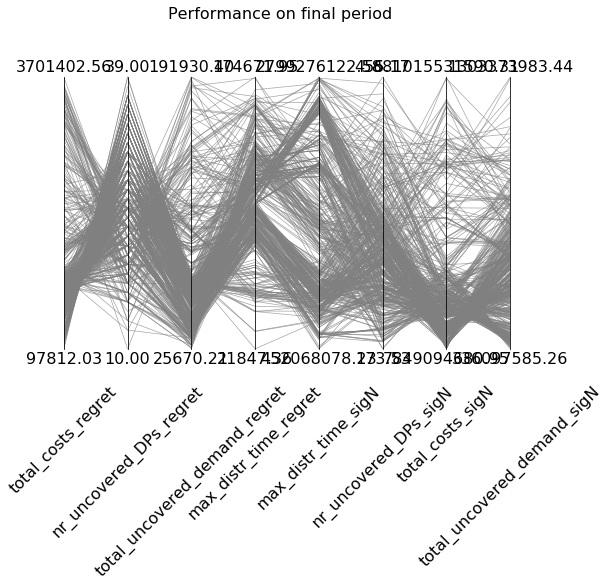

In [21]:
plot_optimal(performance_multi_period_robust, rob_oois, "Performance on final period")

    Define performance of each leaf:
        create hypervolumes for each leaf
        Check for nondominated or not: {0,1} classification
    

### Calculate robustness performance over time

Do this also for best-estimate performance over time

In [22]:
last_p = max([int(key[1:]) for key in global_label_tree.keys()])
last_p_labels = global_label_tree["p{}".format(last_p)]

In [23]:
def performance_over_time_df(objective, last_p_labels):
    performance_dict = {}
    for label in last_p_labels:
#         print(label)
        trace = find_full_trace(label)
#         print(trace)
        # find all decisions made for each leave
        decisions = find_decision(global_policy_tree, trace)
        #     print(decisions)

        # create dataframe with performance of a leave for each period
        temp_list = list()
        for i in range(len(trace) - 1):
            #         print(i)
            tempdf = pd.read_csv(
                "{}/{}/nondom_rob_pols{}.csv".format(case, output_folder,
                                                     trace[i]),
                index_col=0)
            temp_array = tempdf[tempdf.index == int(decisions[i][3:])]
            temp_list.append(float(temp_array[objective]))

        performance_dict[label] = (temp_list)
    tempdf2 = pd.DataFrame.from_dict(
        performance_dict,
        orient="index",
        columns=list(global_label_tree.keys())[1:])
    return tempdf2

In [24]:
dict_performance_over_time = dict()
for ooi in rob_oois:
    dict_performance_over_time[ooi] = performance_over_time_df(
        ooi, last_p_labels)

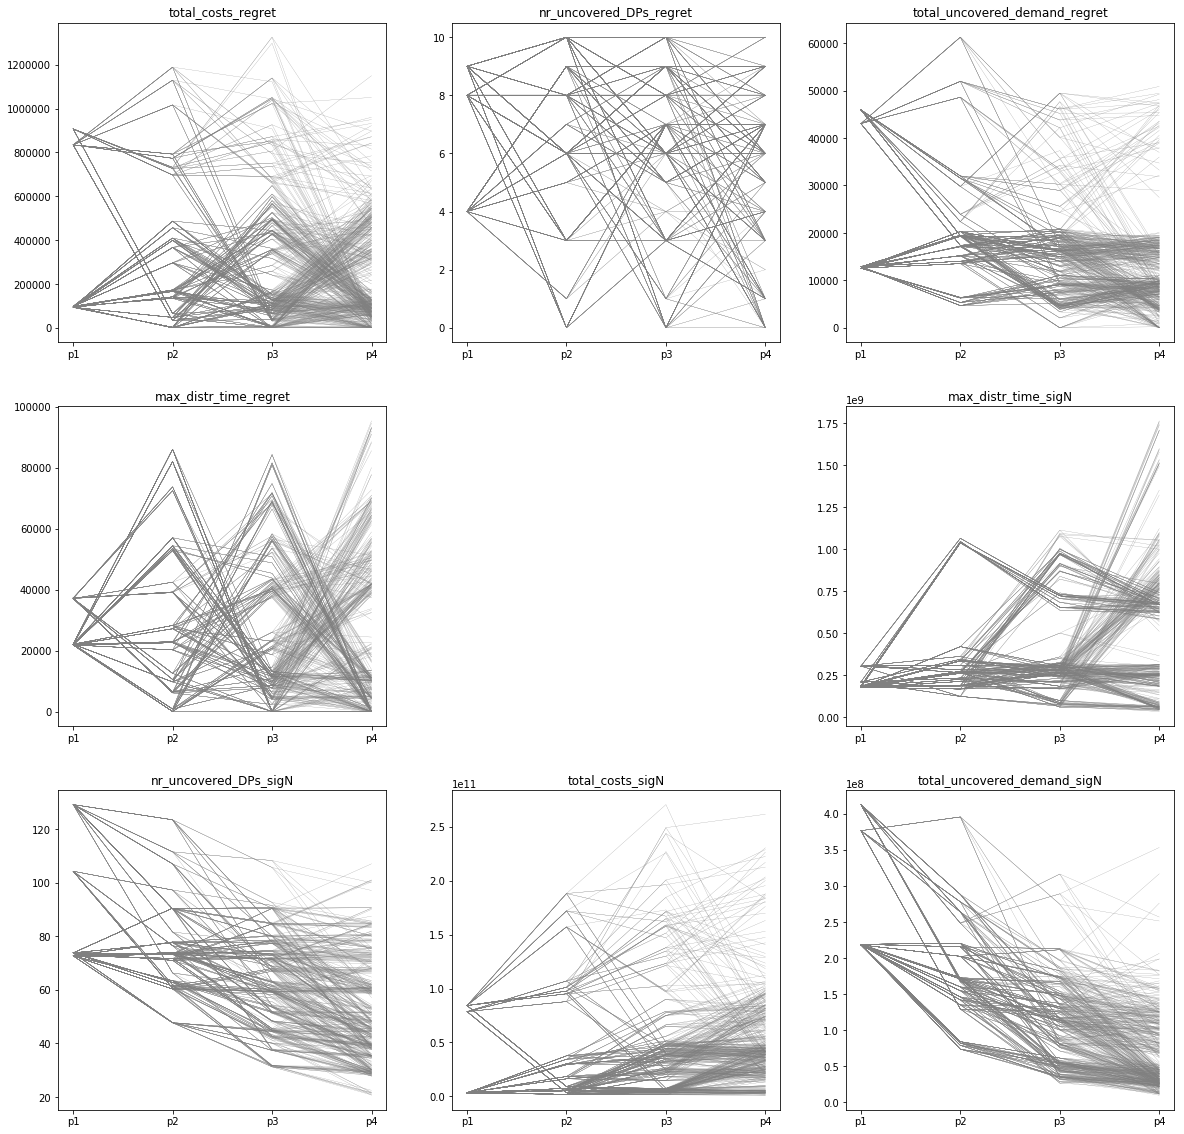

In [25]:
fig = plt.figure(figsize=(20,20))
for i, (key, df) in enumerate(dict_performance_over_time.items()):
    if i>=4:
        i += 1
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(df.T, linewidth=0.2, color="grey")
    ax.set_title(key)
    
#     plot_optimal(df, df.columns, "Performance over time: {}".format(key))

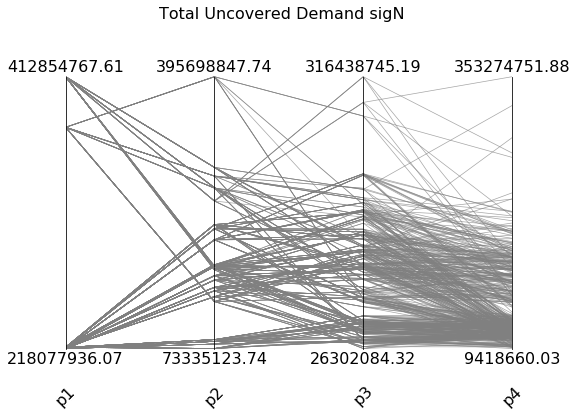

In [26]:
plot_optimal(df, df.columns, "Total Uncovered Demand sigN" )

### Calculate Hypervolumes for last period (for alternatives under uncertainty)

In [27]:
# Normalise last step results

# Set reference point vector[0,..,0] with length for objs.

# Calculate Hypervolume



In [28]:
performance_multi_period_robust.head()

,total_costs_regret,nr_uncovered_DPs_regret,total_uncovered_demand_regret,max_distr_time_regret,max_distr_time_sigN,nr_uncovered_DPs_sigN,total_costs_sigN,total_uncovered_demand_sigN
p0n0p1n1p2n10p3n56p4n277,1.155719e+06,26.0,55113.667260,124872.204309,2.012480e+09,280.141387,1.238735e+11,5.411749e+08
p0n0p1n1p2n10p3n56p4n278,6.790460e+05,32.0,64479.462285,119095.615755,2.040298e+09,267.854869,5.498763e+10,5.804690e+08
p0n0p1n1p2n10p3n56p4n279,1.054367e+06,23.0,45964.151514,119095.615755,2.040298e+09,263.756901,1.105833e+11,5.241672e+08
p0n0p1n1p2n10p3n56p4n280,6.474680e+05,29.0,61086.956244,119095.615755,2.040298e+09,292.863056,5.686753e+10,5.924042e+08
p0n0p1n1p2n10p3n56p4n281,5.785164e+05,32.0,64479.462285,119095.615755,2.040298e+09,290.675207,5.173362e+10,6.034178e+08


In [29]:
def normalise_df (df):
    normalised_df=(df-df.min())/(df.max()-df.min())
    return normalised_df

In [30]:
print("Warning!! Normalise should be together with perfectInfo network")
normalised_final_robust_performance = normalise_df(performance_multi_period_robust)

Warning!! Normalise should be together with perfectInfo network


#### with Pygmo 

In [31]:
import pygmo as pg

In [33]:
testnp = np.array(normalised_final_robust_performance)

In [34]:
testnp.shape

(537, 8)

In [35]:
hv = pg.hypervolume(testnp)

In [36]:
ref_point = [1,]*8

In [61]:
hv.compute(ref_point, hv_algo=pg.hvwfg())

0.3246906264171742

In [38]:
contributions = hv.contributions(ref_point)

In [39]:
testdf = pd.DataFrame(contributions)

In [40]:
contributions.shape

(537,)

#### With Platypus

In [42]:
from platypus import Hypervolume, calculate

In [162]:
hyp = Hypervolume(minimum=[0]*8, maximum=[1]*8)

In [214]:
# Doesnt work, because it requires platypus optimisation result format
# Do it with Erin's code'
# hyp_result = calculate(testnp, hyp)

### Calculate uncertainty ranges

#### Last step

In [ ]:
# Create 

#### All steps

In [41]:
uncertainty_over_time = pd.DataFrame()
for key in sorted(global_dfs_var_unc_data.keys()):
    tmp = global_dfs_var_unc_data[key].upper - global_dfs_var_unc_data[key].lower
    uncertainty_over_time = uncertainty_over_time.append(
        [[tmp.mean(), tmp.min(), tmp.max(),
         tmp.sum()]])
    
uncertainty_over_time.columns = ['mean', 'min', 'max','sum']
uncertainty_over_time.index = sorted(global_dfs_var_unc_data)

In [44]:
global_label_tree["p1"]

['p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4']

In [45]:
uncertainty_over_time.loc[['p0n0p1n1', 'p0n0p1n2', 'p0n0p1n3', 'p0n0p1n4']]

,mean,min,max,sum
p0n0p1n1,0.406435,0.044234,0.862480,20.321730
p0n0p1n2,0.406128,0.044234,0.763854,20.306407
p0n0p1n3,0.412150,0.044234,0.862480,20.607510
p0n0p1n4,0.405883,0.044234,0.862480,20.294147


In [46]:
uncertainty_at_p = dict()

In [47]:
sorted(global_label_tree.keys())

['p0', 'p1', 'p2', 'p3', 'p4']

In [48]:
for key1 in reversed(sorted(global_label_tree.keys())):
    # put in dictionary
    uncertainty_at_p[key1] = uncertainty_over_time[[[
        True if key1 in key2 else False
    ] for key2 in uncertainty_over_time.index]]
    # Delete from list
    uncertainty_over_time = uncertainty_over_time[[[
        False if key1 in key2 else True
    ] for key2 in uncertainty_over_time.index]]

In [49]:
tempdf = uncertainty_at_p['p4']

In [50]:
tempdf['sum'].values

array([5.02380792, 5.15575515, 4.86662756, 5.22217125, 5.35862239,
       5.27857145, 5.13642642, 4.84383497, 4.86278643, 5.34058716,
       5.2828255 , 4.65212255, 4.64865867, 4.6427208 , 4.72686991,
       4.66495826, 4.66149439, 4.64156289, 4.75213485, 5.22395884,
       4.94342213, 4.97612938, 5.46708849, 5.37035792, 5.47508271,
       5.47670263, 5.18249126, 5.202085  , 5.58271428, 5.71794344,
       5.28820442, 5.13102407, 5.35512465, 5.63780632, 5.51963533,
       4.91651905, 4.84918706, 4.9075176 , 4.98863373, 5.01253886,
       5.25991656, 4.96852141, 4.99034424, 5.40171679, 5.51512907,
       4.93014781, 4.90675245, 4.86519517, 5.01439607, 5.02652967,
       6.01889914, 5.75665375, 5.4640623 , 5.73207805, 5.4840032 ,
       5.85535098, 5.88691044, 5.54943303, 5.52427169, 5.25684157,
       5.27653708, 5.65597629, 5.79577669, 4.79406091, 4.92901061,
       4.98567118, 5.09011919, 4.53979139, 4.70090465, 4.68315238,
       4.73024278, 4.74130072, 4.58531668, 4.96554717, 5.07590

### Visualise uncertainty ranges x hypervolumes

In [51]:
contributions

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.80313384e-06, 8.28653787e-08,
       1.87810813e-05, 4.38681500e-05, 7.15004367e-08, 1.69548969e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.19743552e-05,
       0.00000000e+00, 0.00000000e+00, 1.80365466e-09, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.07416580e-10, 0.00000000e+00,
       0.00000000e+00, 5.46186880e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.54627649e-10, 4.50226490e-08, 1.16494269e-06, 1.79188545e-08,
       2.80441059e-06, 9.08830121e-08, 6.64084550e-05, 2.04644342e-07,
       3.28905407e-04, 0.00000000e+00, 0.00000000e+00, 2.17690960e-07,
       3.82689225e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.57015984e-06, 1.73662426e-05, 2.12600779e-05, 1.12499589e-08,
      

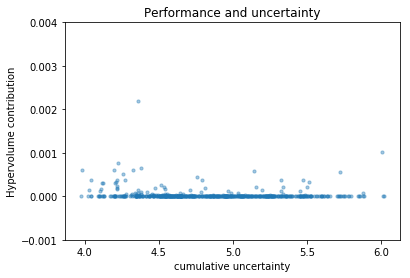

In [60]:
plt.scatter(tempdf['sum'].values, contributions, s=10, alpha=0.4)
plt.title("Performance and uncertainty")
plt.xlabel('cumulative uncertainty')
plt.ylabel('Hypervolume contribution')
plt.ylim((-0.001,0.004))
plt.show()

#### Visualise uncertainty ranges x hypervolumes over time

### Compare hypervolumes for perfect info and uncertainty

Compare perfect and uncertain information hypervolume (= single value for full pareto front)
    When normalising for the two outcome comparisons: make sure to use min and max on both dataframes
that is the price you pay for not having perfect information

Maybe do this for every period? 
    Maybe not: different way of running perfect info network. Also the reduction of information over time should then be included. 
    If you do this for every period